# __Information Assurance__

## __Evolving trends in Information Assurance, a NLP analysis of the Literature from 1967 to 2024__

In this work, we will carry out a Systematic Topic Review (STR) for topic extraction and Chain of Density (CoD) + Few-Shots for summarizing the contents.

The ultimate goal of this work is to perform sumatizations for each decade from 1967 to the present to understand what has been researched in matters of information assurance.

# <font color='blue'>__Pre-processing__</font>

## Preamble

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import missingno as msno

## Data

In [11]:
path_file = '/content/drive/MyDrive/_RESEACH/Information_assurance/Data/'
img_path = '/content/drive/MyDrive/_RESEACH/Information_assurance/img/'

In [3]:
# Loading data

df1 = pd.read_csv(path_file+'scopus-1967-2000.csv')
df2 = pd.read_csv(path_file+'scopus-2001-2005.csv')
df3 = pd.read_csv(path_file+'scopus-2006-2006.csv')
df4 = pd.read_csv(path_file+'scopus-2007-2007.csv')
df5 = pd.read_csv(path_file+'scopus-2008-2008.csv')
df6 = pd.read_csv(path_file+'scopus-2009-2009.csv')
df7 = pd.read_csv(path_file+'scopus-2010-2010.csv')
df8 = pd.read_csv(path_file+'scopus-2011-2011.csv')
df9 = pd.read_csv(path_file+'scopus-2012-2012.csv')
df10 = pd.read_csv(path_file+'scopus-2013-2013.csv')
df11 = pd.read_csv(path_file+'scopus-2014-2015.csv')
df12 = pd.read_csv(path_file+'scopus-2016-2016.csv')
df13 = pd.read_csv(path_file+'scopus-2017-2017.csv')
df14 = pd.read_csv(path_file+'scopus-2018-2018.csv')
df15 = pd.read_csv(path_file+'scopus-2019-2019.csv')
df16 = pd.read_csv(path_file+'scopus-2020-2020.csv')
df17 = pd.read_csv(path_file+'scopus-2021-2021.csv')
df18 = pd.read_csv(path_file+'scopus-2022-2022.csv')
df19 = pd.read_csv(path_file+'scopus-2023-2024.csv')


In [5]:
df18.Year.value_counts()

2022    9205
2024       7
2023       3
Name: Year, dtype: int64

In [6]:
# Fixing two datasets
df18.Year = 2022
df14.Year = 2018


In [7]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16, df17, df18, df19])


In [8]:
print(df.Year.value_counts())


2023    10594
2022     9215
2021     7395
2020     5420
2019     4526
2018     3600
2017     2971
2016     2382
2015     1873
2014     1781
2013     1620
2012     1396
2011     1382
2010     1361
2009     1098
2007     1049
2008     1000
2006      794
2005      678
2003      483
2004      471
2002      299
2001      214
2000      134
1996       83
1998       76
1999       65
1997       57
1993       51
1995       43
1994       34
2024       30
1990       27
1992       25
1991       18
1989       17
1986       13
1987       12
1984       11
1988       10
1983        8
1985        7
1975        4
1979        4
1982        3
1978        3
1980        3
1981        1
1968        1
1967        1
1972        1
Name: Year, dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62344 entries, 0 to 10620
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            59921 non-null  object 
 1   Author full names  59921 non-null  object 
 2   Author(s) ID       59921 non-null  object 
 3   Title              62343 non-null  object 
 4   Year               62344 non-null  int64  
 5   Cited by           62340 non-null  float64
 6   DOI                51051 non-null  object 
 7   Link               62344 non-null  object 
 8   Abstract           62344 non-null  object 
 9   Author Keywords    49244 non-null  object 
 10  Index Keywords     48223 non-null  object 
 11  Document Type      33802 non-null  object 
 12  Source             33802 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 6.7+ MB


In [13]:
# Barchar that shows publications per Year.
fig = go.Figure(data=[go.Bar(
    x=df.Year.value_counts().index,
    y=df.Year.value_counts().values
)])

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Year',
    yaxis_title='Number of publications',
    title='Number of publications per year'
)
fig.write_html(img_path + '/n_publications.html')
fig.show()


In [14]:
# Adding a red line indicating the average citation per year

fig = go.Figure(data=[go.Bar(
    x=df.Year.value_counts().index,
    y=df.Year.value_counts().values
)])

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Year',
    yaxis_title='Number of publications',
    title='Number of publications per year'
)


# Calculate average citations per year
avg_citations = df.groupby('Year')['Cited by'].mean()

# Add a red line to the plot showing the average citations per year
fig.add_trace(go.Scatter(
    x=avg_citations.index,
    y=avg_citations.values,
    mode='lines',
    line_color='red'
))

# Add a second y-axis for the citations
fig.update_layout(
    yaxis2=dict(
        title='Average citations per year',
        overlaying='y',
        side='right'
    )
)

fig.show()


In [15]:
# Create a bar plot for the number of publications per year
fig = go.Figure(data=[go.Bar(
    x=df['Year'].value_counts().index,
    y=df['Year'].value_counts().values,
    name='Number of Publications'
)])

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Year',
    yaxis_title='Number of Publications',
    title='Per Year Analysis'
)

# Calculate average citations per year
avg_citations = df.groupby('Year')['Cited by'].mean()

# Add a red line to the plot showing the average citations per year
fig.add_trace(go.Scatter(
    x=avg_citations.index,
    y=avg_citations.values,
    mode='lines',
    line_color='red',
    name='Average Citations',
    yaxis='y2'  # Assign this trace to the second y-axis
))

# Add a second y-axis for the citations
fig.update_layout(
    yaxis2=dict(
        title='Average Citations per Year',
        overlaying='y',
        range=[0, 300],  # Set the range for y2 axis
        side='right',
        showgrid=False  # Optional: turn off the gridlines for the second y-axis
    )
)
fig.write_html(img_path + '/citations_per_year.html')
fig.show()


In [16]:
# box plots for "Cited by" var

fig = go.Figure()

for year in df['Year'].unique():
    df_year = df[df['Year'] == year]
    fig.add_trace(go.Box(
        x=df_year['Cited by'],
        name=str(year)
    ))

fig.update_layout(
    plot_bgcolor='white',
    title='Horizontal Box Plots of Cited by per Year',
    xaxis_title='Cited by',
    yaxis_title='Year'
)

fig.show()


In [17]:
# single violin plot with "Cited by". In "Cited by" eliminates values greater than 1000

df_filtered = df[df['Cited by'] <= 1000]
fig = go.Figure(data=[go.Violin(
    x=df_filtered['Cited by'],
    name='All Years'
)])

fig.update_layout(
    plot_bgcolor='white',
    title='Violin Plot of Cited by',
    xaxis_title='Cited by',
    yaxis_title='Year'
)
fig.write_html(img_path + '/cited_by_violin.html')
fig.show()


In [18]:
# create a new version of df called df_no_outl, without outliers in "Cited by"

df_filtered = df[df['Cited by'] < 300]

In [19]:
# plotly.figure_factory as ff

# Create the density map
fig = ff.create_2d_density(
    x=df_filtered['Year'],
    y=df_filtered['Cited by'],
    colorscale='Viridis',
    hist_color='rgba(0.8, 1.0, 0, 0.5)',
    point_size=3
)

# Update layout if needed
fig.update_layout(
    title='Density Map of Citations over Years',
    xaxis_title='Year',
    yaxis_title='Citations',
    width=900,  # Making the plot wider
    height=600,
    plot_bgcolor='white'
)
fig.write_html(img_path + '/citations_per_year_density.html')
fig.show()


In [20]:
# Year to categorical (decade)
pd_cat = df[['Document Type', 'Year']]

pd_cat['Decade'] = pd_cat['Year'].apply(lambda x: x // 10 * 10)
pd_cat.drop('Year', axis=1, inplace=True)
pd_cat.dropna(inplace=True)
pd_cat


,Document Type,Decade
0,Conference paper,2010
1,Review,2010
2,Article,2010
3,Conference paper,2010
4,Conference paper,2010
...,...,...
10616,Article,2020
10617,Conference paper,2020
10618,Article,2020
10619,Conference paper,2020


In [21]:
# plotly.express as px

# Create a Parallel Categories Diagram
fig = px.parallel_categories(pd_cat)

# Update layout
fig.update_layout(
    title='Parallel Categories Diagram',
    width=900,  # Adjust width if needed
    height=600   # Adjust height if needed
)

fig.show()

In [22]:
df.head(3).T


,0,1,2
Authors,Anderson J.P.,Evans M.,Wood C.C.; Zeidler H.M.
Author full names,"Anderson, James P. (56137308100)","Evans, Mike (55727618500)","Wood, Charles Cresson (57210508279); Zeidler, ..."
Author(s) ID,56137308100,55727618500,57210508279; 7101647420
Title,Information Security in a Multi-User Computer ...,Security advances in banking systems,Security modules: Potent information security ...
Year,1972,1985,1986
Cited by,25.0,0.0,1.0
DOI,10.1016/S0065-2458(08)60506-9,10.1016/0011-684X(85)90136-4,10.1016/0167-4048(86)90133-1
Link,https://www.scopus.com/inward/record.uri?eid=2...,https://www.scopus.com/inward/record.uri?eid=2...,https://www.scopus.com/inward/record.uri?eid=2...
Abstract,The problem of “computer security” ranges from...,"In retail and international banking, there is ...","In the future, the security of computer and da..."
Author Keywords,NaN,banking; computer networks; data processing,cryptographic security module; Security module...


### Word clouds

In [23]:
# new df from 'Index Keywords'
df_kw = df['Index Keywords'].str.lower().str.split(';').explode().str.strip().value_counts().to_frame().reset_index()
df_kw

,index,Index Keywords
0,security of data,18271
1,cyber security,14503
2,cybersecurity,13793
3,network security,12728
4,cryptography,4809
...,...,...
78845,character spacings,1
78846,precipitation (meteorology),1
78847,inference mechanism,1
78848,packet aggregation,1


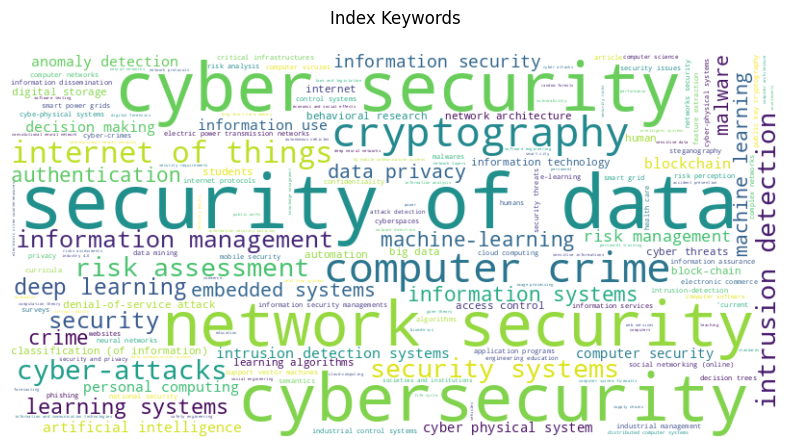

In [24]:
# wordcloud import WordCloud

# Convertir el DataFrame a un diccionario donde las palabras son las claves y las frecuencias son los valores
data = dict(zip(df_kw['index'], df_kw['Index Keywords']))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Index Keywords\n')
plt.savefig(img_path + '/index_keywords.png', dpi=300)
plt.show()

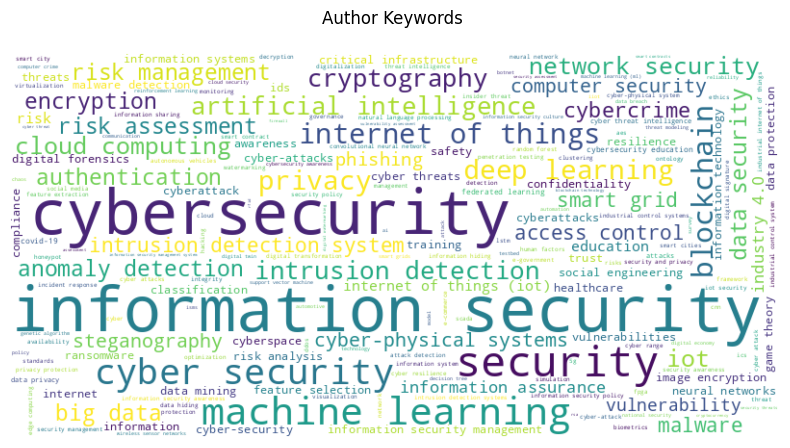

In [25]:
# new df from 'Author Keywords'
df_akw = df['Author Keywords'].str.lower().str.split(';').explode().str.strip().value_counts().to_frame().reset_index()
data = dict(zip(df_akw['index'], df_akw['Author Keywords']))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Author Keywords \n')
plt.savefig(img_path + '/author_keywords.png', dpi=300)
plt.show()

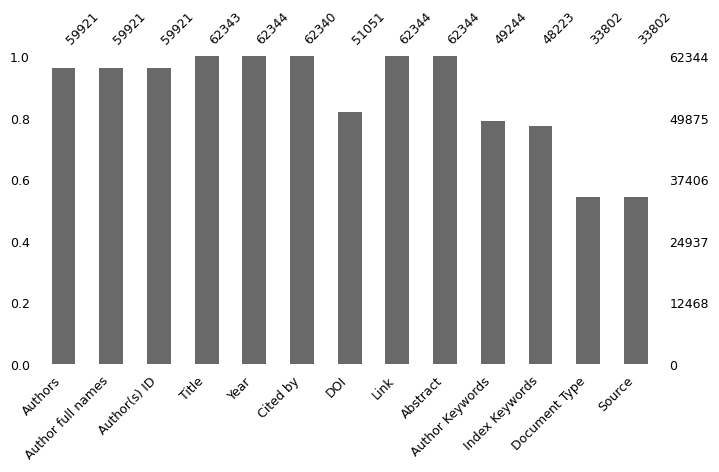

In [28]:
msno.bar(df, figsize=(8, 4), fontsize=9)
plt.savefig(img_path + '/missing_values.png', dpi=300)
plt.show()

In [29]:
# to pickle
df.to_pickle(path_file + 'df_scopus_info_assurance_v2.pkl')
